In [7]:
CATSnDOGS <- as.matrix(read.csv("CATSnDOGS.csv"))
Labels <- as.matrix(read.csv("Labels.csv"))

digtest <- function(x,y) {
    t.test(x~as.factor(y))$p.val }

tt <- apply(CATSnDOGS, 2, digtest, y=as.factor(Labels))


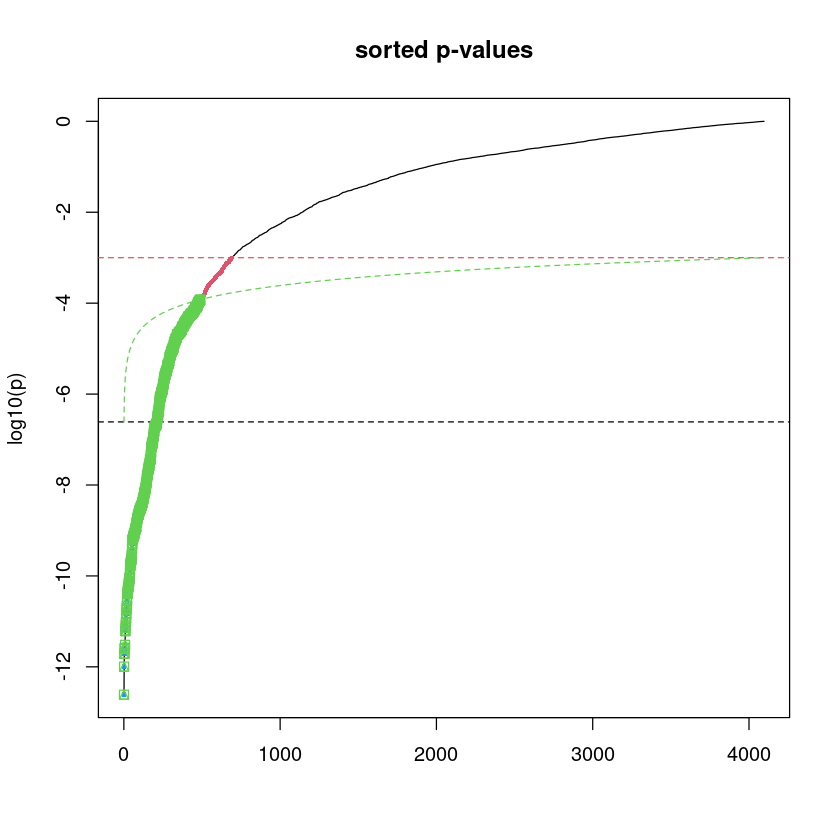

In [34]:
alfa <- 0.001 # change as you will
nu <- 4096
####
ps <- sort(tt)

plot(seq(1,length(ps)),log10(ps), type="l",main="sorted p-values",xlab="", ylab="log10(p)")
abline(h=log10(alfa),col=2, lty=2)      # standard test
abline(h=log10(alfa/nu),col=, lty=2)   # Bonferroni
points(seq(1,length(ps[ps<alfa])),log10(ps[ps<alfa]),col=2,cex=0.5,pch=16)
points(seq(1,length(ps[ps<alfa/nu])),log10(ps[ps<alfa/nu]),col=4,cex=0.5,pch=15)
aa<-alfa*seq(1,nu)/nu
lines(seq(1,nu),log10(aa),col=3,lty=2)  # BH
points(seq(1,length(ps[ps<aa])),log10(ps[ps<aa]),col=3,pch=14)

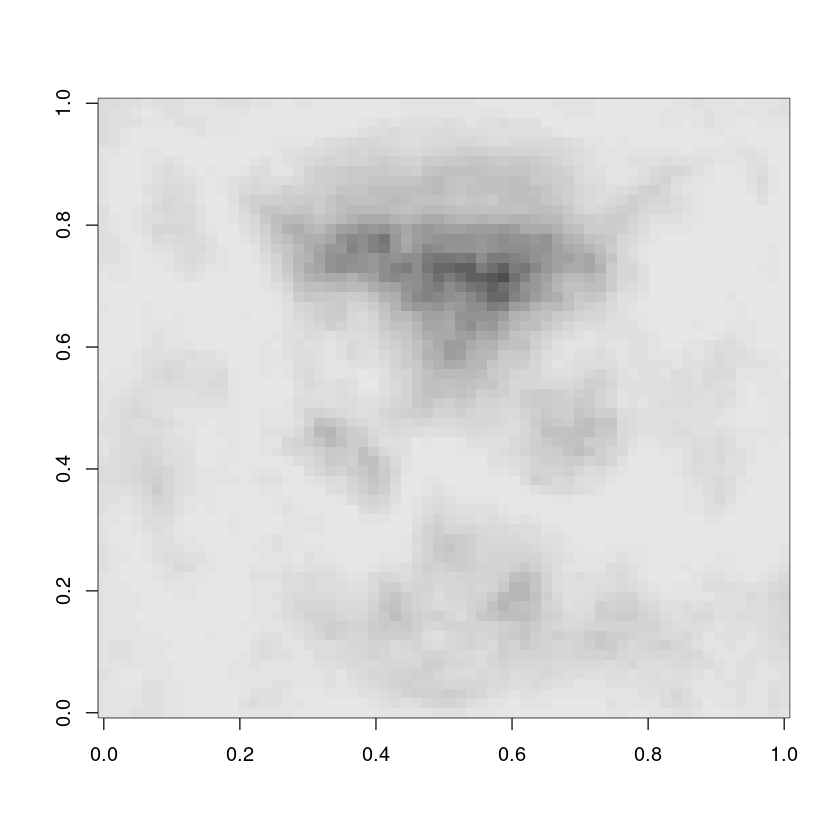

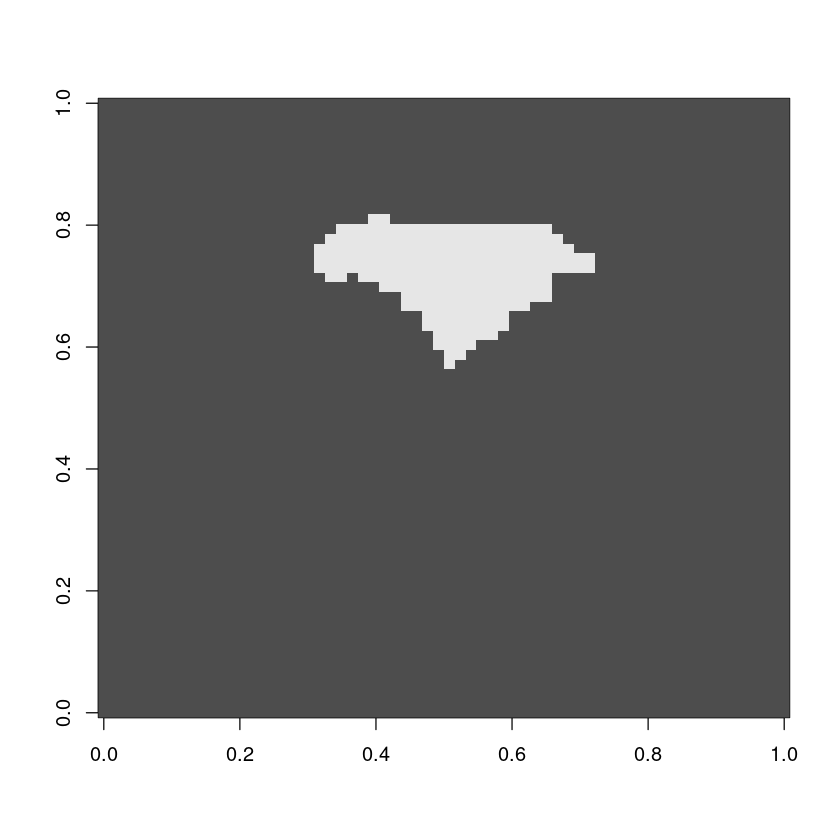

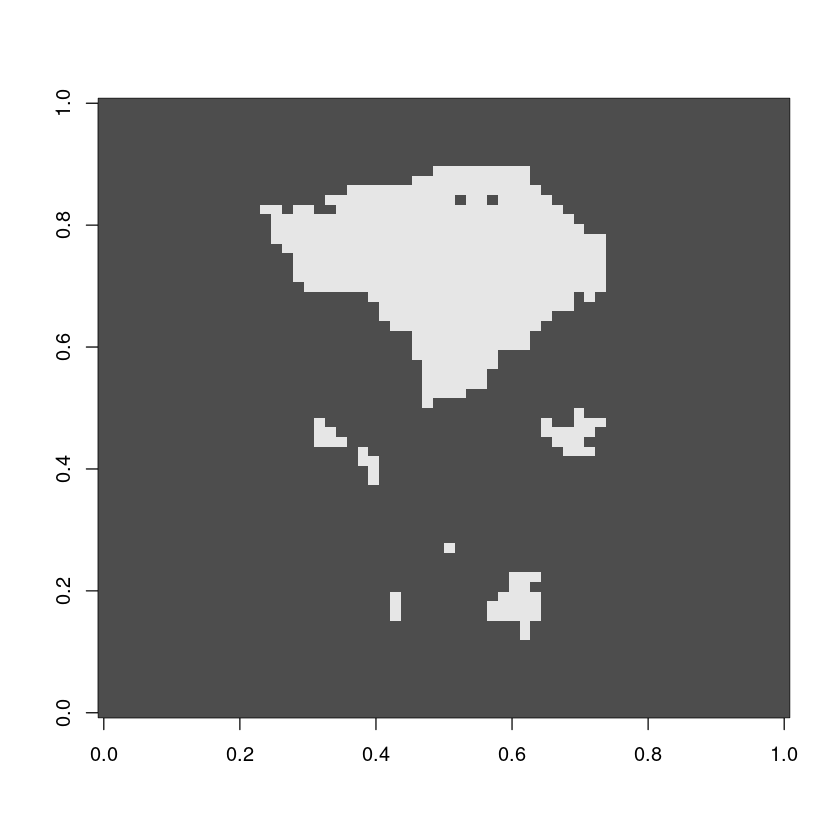

In [35]:
ii <- seq(1,dim(CATSnDOGS)[2])[tt<alfa/nu] # the Bonferroni significant pixels
#
image(t(matrix(as.numeric(log10(tt)),64,64,byrow=F))[,64:1], col = gray.colors(33)) 
      # the raw p-values - dark means smaller p-value
#
Picimage <- rep(0,4096)
Picimage[ii] <- 1
image(t(matrix(as.numeric(Picimage),64,64,byrow=F))[,64:1], col = gray.colors(33)) # Bonferroni selected 
#
p.adj<-p.adjust(tt,"BH")
ii <- seq(1,dim(CATSnDOGS)[2])[p.adj<alfa]
Picimage <- rep(0,4096)
Picimage[ii] <- 1
image(t(matrix(as.numeric(Picimage),64,64,byrow=F))[,64:1], col = gray.colors(33)) # BH selected